# Proyecto 03 - Sistemas de Recomendación

## Dataset: STEAM

**Recuerda descargar el dataset de [aquí](https://github.com/kang205/SASRec). Son dos archivos, uno de calificaciones y otro de información sobre los juegos.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset. Sin embargo, **deberás** modificarlas para hacer un mejor manejo de datos. Algunas cosas a las que deberás prestar atención (tal vez no a todas):
1. Tipos de datos: elige tipos de datos apropiados para cada columna.
2. Descartar columnas poco informativas.
3. Guardar en memoria datasets preprocesados para no tener que repetir código que tarde en correr.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿cuáles son los juegos más populares?¿Y los menos populares?

### Filtro Colaborativo

Deberás implementar un sistema de recomendación colaborativo para este dataset. Ten en cuenta:

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada sus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo.

Puedes implementar un filtro colaborativo a partir de la similitud coseno o índice de Jaccard. ¿Puedes utilizar los métodos de la librería Surprise? Si no es así, busca implementaciones (por ejemplo, nuevas librerías) que sean apropiadas.

Para comenzar a trabajar, puedes asumir que cada entrada es un enlace entre una persona usuaria y un item, **independientemente** de si la crítica es buena o mala. 

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo harías para ponerle un valor a la calificación?
1. ¿Cómo harías para agregar contenido? Por ejemplo, cuentas con el género, precio, fecha de lanzamiento y más información de los juegos.
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

#Exploración de datos

Montamos el contenido de drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import gc
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
import gzip
import pandas as pd

def parse(path):
    g = gzip.open(path, 'r')
    for l in g:
        yield eval(l)

**Variables PATH**

Definimos variables con el path de los datasets:

In [ ]:
# Path dataset de reviews comprimido gz
PATH_DATASET_REVIEWS_GZ = '/content/drive/MyDrive/Colab Notebooks/proyecto03/steam_reviews.json.gz'
# Path dataset de reviews formato csv
PATH_DATASET_REVIEWS_CSV = '/content/drive/MyDrive/Colab Notebooks/proyecto03/reviews.csv'
# Path dataset de games comprimido gz
PATH_DATASET_GAMES_GZ = '/content/drive/MyDrive/Colab Notebooks/proyecto03/steam_games.json.gz'
# Path dataset de games formato csv
PATH_DATASET_GAMES_CSV = '/content/drive/MyDrive/Colab Notebooks/proyecto03/games.csv'

**Usar datasets preprocesados**

Si se quiere utilizar datos preprocesados, pasar a la sección `"Leer datos procesados Review"` y `"Leer datos procesados Games"`, y no ejecutar las secciones `"Procesar datos Review"` y `"Procesar datos Games"`.

#### Procesar datos Review

**Reviews**

In [ ]:
contador = 0
data_reviews = []
# Vamos a guardar una de cada 10 reviews para no llenar la memoria RAM. Si pones n = 3, 
# abrira uno de cada tres, y asi.
n = 10
for l in parse(PATH_DATASET_REVIEWS_GZ):
    if contador%n == 0:
        data_reviews.append(l)
    else:
        pass
    contador += 1
pd_data_reviews = pd.DataFrame(data_reviews)


Liberamos memoria

In [ ]:
del data_reviews
gc.collect()

190

Exploramos algunos registros del dataset de reviews

In [ ]:
pd_data_reviews.head(10)

,username,hours,products,product_id,page_order,date,text,early_access,page,user_id,compensation,found_funny
0,Chaos Syren,0.1,41.0,725280,0,2017-12-17,This would not be acceptable as an entertainme...,False,1,NaN,NaN,NaN
1,Ariman1,13.2,1386.0,328100,2,2017-08-02,Addictive RPG ! Works fine on linux though it ...,False,1,NaN,NaN,NaN
2,freakfantom,0.1,1706.0,725280,5,2017-11-12,Прикольная стрелялка. Взял дешево на распродаже.,False,1,NaN,NaN,NaN
3,The_Cpt_FROGGY,7.8,2217.0,631920,0,2017-12-11,Somewhere on Zibylon:\n~~~~~~~~~~~~~~~~~~\nZib...,False,1,76561198003030375,Product received for free,NaN
4,the_maker988,8.2,18.0,35140,7,2018-01-02,"This game was way to linear for me, and compar...",False,1,76561198353396844,NaN,NaN
5,Szudof,0.2,155.0,288690,0,2016-08-31,"<23:32:55> ""Pit"": Hello, my name is dominik di...",False,1,NaN,Product received for free,3.0
6,Vonder,2.7,264.0,35600,3,2017-04-15,I like the art style and the idea but what a b...,False,1,76561198113497324,NaN,NaN
7,LucaFox,4.0,136.0,620900,3,2017-09-11,"Very, very good game. I love dungeon crawlers,...",False,1,76561198146674484,NaN,1.0
8,rampage1209,34.8,3.0,1840,4,2018-01-04,WAY PAST COOL,False,1,76561198080474371,NaN,NaN
9,Devil Azite,0.1,548.0,671270,5,2017-07-09,Putting a hat on your head has disasterous rep...,False,1,NaN,Product received for free,1.0


In [ ]:
pd_data_reviews.sample(20)

,username,hours,products,product_id,page_order,date,text,early_access,page,user_id,compensation,found_funny
668045,Zohar,8.9,214.0,6000,6,2015-11-27,"Incredibly short, but still a great game",False,222,NaN,NaN,NaN
420538,vista_sucks,21.9,1553.0,15130,1,2016-11-25,Great Story\nGreat Gameplay\nStill Playing it ...,False,21,76561198040604448,NaN,NaN
718701,Lord Beor,7.1,89.0,361420,5,2017-09-22,sigh....\nAnother early access mess.\nProgress...,True,130,NaN,NaN,1.0
109996,MrHonestFool,0.3,226.0,104900,8,2016-06-24,Mmmmm i wouldnt say it's bad.. but i wouldnt ...,False,263,NaN,NaN,NaN
721905,SPECTER1987,25.1,NaN,224260,8,2014-05-10,definetly the best 3d zombie game i have ever ...,False,1585,NaN,NaN,NaN
426798,UnlikelyheroXenohart,18.6,352.0,251130,2,2016-04-08,Very easy to recommend this title to anyone wh...,False,75,NaN,NaN,NaN
127602,Barnabus Flash,58.8,56.0,113200,1,2013-12-24,This game is great. If you ever wanted an old-...,False,1692,76561197987855455,NaN,NaN
305648,TacoPaco,53.6,103.0,221380,8,2014-07-01,This game... There is alot to say about it. I ...,False,1735,NaN,NaN,NaN
612318,mr shago,111.2,85.0,212680,4,2015-06-17,Its very fun with lots of difficulty that peop...,False,1136,76561198014302345,NaN,NaN
388179,gimp,0.3,41.0,440,2,2016-02-10,good game,False,9705,76561198114551056,NaN,NaN


In [ ]:
pd_data_reviews.describe()

,hours,products,page_order,page,found_funny
count,776670.000000,777741.000000,779307.000000,779307.000000,120164.000000
mean,111.843832,236.993936,4.417743,893.581355,7.713125
std,390.145376,486.034479,2.897848,1928.272966,72.465816
min,0.000000,1.000000,0.000000,1.000000,1.000000
25%,4.000000,45.000000,2.000000,53.000000,1.000000
50%,15.300000,110.000000,4.000000,238.000000,1.000000
75%,59.600000,246.000000,7.000000,829.000000,3.000000
max,28164.000000,13540.000000,9.000000,18371.000000,6524.000000


In [ ]:
pd_data_reviews.describe()

,hours,products,page_order,page,found_funny
count,776670.000000,777741.000000,779307.000000,779307.000000,120164.000000
mean,111.843832,236.993936,4.417743,893.581355,7.713125
std,390.145376,486.034479,2.897848,1928.272966,72.465816
min,0.000000,1.000000,0.000000,1.000000,1.000000
25%,4.000000,45.000000,2.000000,53.000000,1.000000
50%,15.300000,110.000000,4.000000,238.000000,1.000000
75%,59.600000,246.000000,7.000000,829.000000,3.000000
max,28164.000000,13540.000000,9.000000,18371.000000,6524.000000


Tipos de datos:

In [ ]:
pd_data_reviews.dtypes

username         object
hours           float64
products        float64
product_id       object
page_order        int64
date             object
text             object
early_access       bool
page              int64
user_id          object
compensation     object
found_funny     float64
dtype: object

Valores nulos:

In [ ]:
pd_data_reviews.isna().sum()

username             0
hours             2637
products          1566
product_id           0
page_order           0
date                 0
text                 0
early_access         0
page                 0
user_id         461967
compensation    764719
found_funny     659143
dtype: int64

Convertimos la columna `username` a string, ya que al guardar a disco el data procesado y luego al leerlos se generaban valores nulos en la columna `username` que en el dataset no existen.

In [ ]:
pd_data_reviews.username = pd_data_reviews.username.astype(str)

In [ ]:
pd_data_reviews.username = pd_data_reviews.username.str.encode('utf-8')

In [ ]:
pd_data_reviews.isna().sum()

username             0
hours             2637
products          1566
product_id           0
page_order           0
date                 0
text                 0
early_access         0
page                 0
user_id         461967
compensation    764719
found_funny     659143
dtype: int64

Vemos la cantidad de datos y columnas:

In [ ]:
pd_data_reviews.shape

(779307, 12)

Vemos la el porcentaje de valores faltantes por columna:

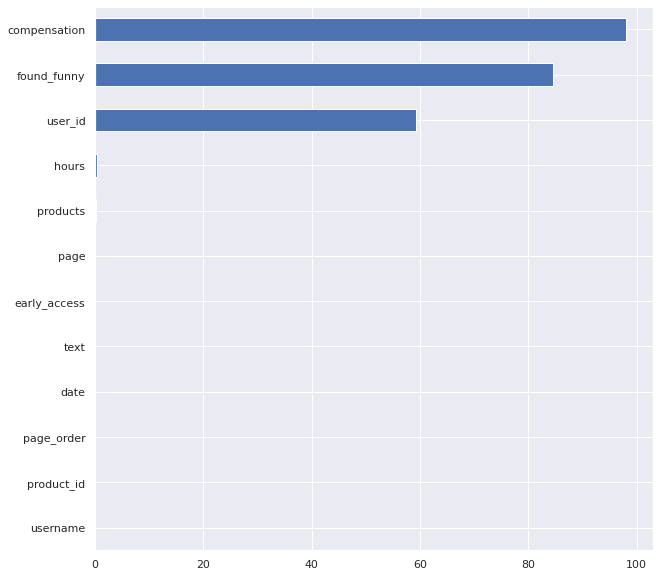

In [ ]:
((pd_data_reviews.isnull().sum()/len(pd_data_reviews))*100).sort_values(ascending=True).plot(kind='barh',figsize=(10,10))
plt.grid(b=True, which='both')

Podemos notar que la columna `'compensation'` tiene casi el 100% de valores faltantes.

Analizamos la columna `compensation`:

In [ ]:
pd_data_reviews.compensation.unique()

array([nan, 'Product received for free'], dtype=object)

In [ ]:
pd_data_reviews.compensation.describe()

count                         14588
unique                            1
top       Product received for free
freq                          14588
Name: compensation, dtype: object

In [ ]:
pd_data_reviews.compensation.isna().sum()

764719

La columna `compensation` tiene un solo valor único `"Product received for free"` y valores faltantes.

Revisamos la columna `'found_funny'`

In [ ]:
pd_data_reviews.found_funny.unique()

array([      nan, 3.000e+00, 1.000e+00, 8.000e+00, 1.200e+01, 4.000e+00,
       2.000e+00, 5.000e+00, 7.000e+01, 1.450e+02, 2.700e+01, 2.300e+01,
       6.600e+01, 6.000e+00, 9.600e+01, 1.520e+02, 3.700e+01, 1.300e+01,
       1.900e+01, 7.000e+00, 2.600e+01, 4.500e+01, 4.100e+01, 6.200e+01,
       1.600e+01, 1.390e+02, 1.400e+01, 4.600e+01, 1.100e+01, 9.000e+00,
       2.200e+01, 5.200e+01, 1.880e+02, 3.600e+01, 3.300e+01, 1.000e+01,
       7.700e+01, 6.400e+01, 3.000e+01, 2.500e+01, 3.100e+01, 8.400e+01,
       8.500e+01, 2.400e+01, 3.200e+01, 1.700e+01, 5.600e+01, 9.100e+01,
       8.600e+01, 3.500e+01, 8.700e+01, 1.800e+01, 3.900e+01, 2.900e+01,
       8.200e+01, 2.000e+01, 1.500e+01, 7.300e+01, 7.200e+01, 1.780e+02,
       4.200e+01, 4.300e+02, 1.060e+02, 7.400e+01, 1.800e+02, 2.120e+02,
       1.080e+02, 1.110e+02, 4.800e+01, 4.400e+01, 6.000e+01, 1.543e+03,
       2.100e+01, 7.900e+01, 1.010e+02, 5.100e+01, 3.880e+02, 2.800e+01,
       5.400e+01, 1.810e+02, 1.470e+02, 5.580e+02, 

In [ ]:
len(pd_data_reviews.found_funny.unique())

635

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


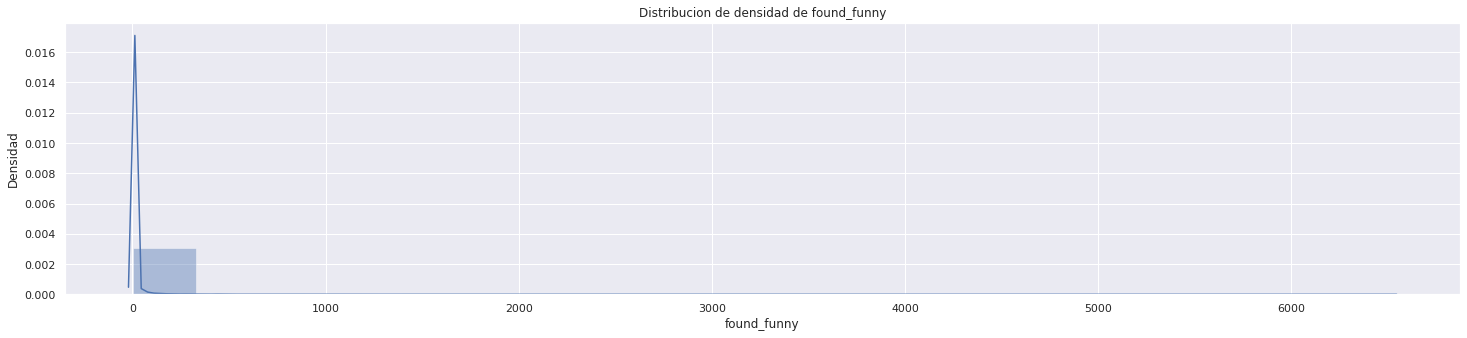

In [ ]:
plt.figure(figsize=(25,5))
plt.title('Distribucion de densidad de found_funny')
plt.xlabel('found_funny')
plt.ylabel('Densidad')
sns.distplot(pd_data_reviews.found_funny, bins = 20, hist=True, kde=True, rug=False)

Para nuestro modelo de la librería **surprise** necesitamos 3 columnas, los ids de usuarios, los ids de los items y el rating. Para esto vamos a utilizar las columnas `'username'`, `'product_id'` y `'found_funny'`.

Vemos que hay valores nulos en la columna `'user_id'` pero no en `'username'`, por lo que para nuestro modelo vamos a utilizar como id de usuario la columna `'username'`.

In [ ]:
data_reviews_3_columns = pd.DataFrame([])


In [ ]:
data_reviews_3_columns['user_id'] = pd_data_reviews.username.astype(str)
data_reviews_3_columns['item_id'] = pd_data_reviews.product_id
data_reviews_3_columns['Rating'] = pd_data_reviews.found_funny

In [ ]:
data_reviews_3_columns.head(10)

,user_id,item_id,Rating
0,b'Chaos Syren',725280,NaN
1,b'Ariman1',328100,NaN
2,b'freakfantom',725280,NaN
3,b'The_Cpt_FROGGY',631920,NaN
4,b'the_maker988',35140,NaN
5,b'Szudof',288690,3.0
6,b'Vonder',35600,NaN
7,b'LucaFox',620900,1.0
8,b'rampage1209',1840,NaN
9,b'Devil Azite',671270,1.0


In [ ]:
data_reviews_3_columns.describe()

,Rating
count,120164.000000
mean,7.713125
std,72.465816
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,6524.000000


In [ ]:
data_reviews_3_columns.isna().sum()

user_id         0
item_id         0
Rating     659143
dtype: int64

In [ ]:
data_reviews_3_columns.shape

(779307, 3)

Guardamos los datos filtrados en disco para que en las próximas consultas no haya que cargar todo el dataset nuevamente:

In [ ]:
data_reviews_3_columns.to_csv(PATH_DATASET_REVIEWS_CSV)

#### Leer datos procesados Review

Verificando valores máximos de float de numpy:

In [ ]:
np.finfo(np.float64)

finfo(resolution=1e-15, min=-1.7976931348623157e+308, max=1.7976931348623157e+308, dtype=float64)

In [ ]:
np.finfo(np.float32)

finfo(resolution=1e-06, min=-3.4028235e+38, max=3.4028235e+38, dtype=float32)

In [ ]:
np.finfo(np.float16)

finfo(resolution=0.001, min=-6.55040e+04, max=6.55040e+04, dtype=float16)

Podemos acotar el tipo de dato de algunas columnas como `page_order`, `page`, `hours`, `products`, `found_funny`:

In [ ]:
df_reviews = pd.read_csv(PATH_DATASET_REVIEWS_CSV, encoding = "ISO-8859-1", index_col = 0, dtype={'Rating': np.float16, 'item_id': np.float32})

Chequeamos nuevamente los tipos de datos:

In [ ]:
df_reviews.dtypes

user_id     object
item_id    float32
Rating     float16
dtype: object

In [ ]:
df_reviews.infer_objects().dtypes

user_id     object
item_id    float32
Rating     float16
dtype: object

Vemos los valores faltantes:

In [ ]:
df_reviews.isna().sum()

user_id         0
item_id         0
Rating     659143
dtype: int64

In [ ]:
df_reviews.head()

,user_id,item_id,Rating
0,b'Chaos Syren',725280.0,NaN
1,b'Ariman1',328100.0,NaN
2,b'freakfantom',725280.0,NaN
3,b'The_Cpt_FROGGY',631920.0,NaN
4,b'the_maker988',35140.0,NaN


#### Procesar datos Games

**Games**

In [ ]:
pd_data_games = []
for l in parse(PATH_DATASET_GAMES_GZ):
    pd_data_games.append(l)
pd_data_games = pd.DataFrame(pd_data_games)

In [ ]:
pd_data_games.head()

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",4.49,http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,False,761140,Kotoshiro,NaN,NaN
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",NaN,http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,643980,Secret Level SRL,Mostly Positive,NaN
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",NaN,http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,False,670290,Poolians.com,Mostly Positive,NaN
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",0.83,http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,False,767400,彼岸领域,NaN,NaN
4,NaN,NaN,Log Challenge,NaN,http://store.steampowered.com/app/773570/Log_C...,NaN,"[Action, Indie, Casual, Sports]",1.79,http://steamcommunity.com/app/773570/reviews/?...,"[Single-player, Full controller support, HTC V...",2.99,False,773570,NaN,NaN,NaN


In [ ]:
pd_data_games.head()

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",4.49,http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,False,761140,Kotoshiro,NaN,NaN
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",NaN,http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,643980,Secret Level SRL,Mostly Positive,NaN
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",NaN,http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,False,670290,Poolians.com,Mostly Positive,NaN
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",0.83,http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,False,767400,彼岸领域,NaN,NaN
4,NaN,NaN,Log Challenge,NaN,http://store.steampowered.com/app/773570/Log_C...,NaN,"[Action, Indie, Casual, Sports]",1.79,http://steamcommunity.com/app/773570/reviews/?...,"[Single-player, Full controller support, HTC V...",2.99,False,773570,NaN,NaN,NaN


Tipos de datos Games

In [ ]:
pd_data_games.dtypes

publisher          object
genres             object
app_name           object
title              object
url                object
release_date       object
tags               object
discount_price    float64
reviews_url        object
specs              object
price              object
early_access         bool
id                 object
developer          object
sentiment          object
metascore          object
dtype: object

In [ ]:
pd_data_games.infer_objects().dtypes

publisher          object
genres             object
app_name           object
title              object
url                object
release_date       object
tags               object
discount_price    float64
reviews_url        object
specs              object
price              object
early_access         bool
id                 object
developer          object
sentiment          object
metascore          object
dtype: object

Valores faltantes:

In [ ]:
pd_data_games.isna().sum()

publisher          8052
genres             3283
app_name              2
title              2050
url                   0
release_date       2067
tags                163
discount_price    31910
reviews_url           2
specs               670
price              1377
early_access          0
id                    2
developer          3299
sentiment          7182
metascore         29458
dtype: int64

Cantidad de datos:

In [ ]:
pd_data_games.shape

(32135, 16)

In [ ]:
pd_data_games.describe()

,discount_price
count,225.000000
mean,11.930533
std,17.492643
min,0.490000
25%,1.390000
50%,4.190000
75%,22.660000
max,139.990000


In [ ]:
pd_data_games.to_csv(PATH_DATASET_GAMES_CSV)

In [ ]:
del pd_data_games

In [ ]:
gc.collect()

3474

#### Leer datos procesados Games

In [ ]:
df_games = pd.read_csv(PATH_DATASET_GAMES_CSV, index_col = 0, dtype={'id': np.float32, 'discount_price': np.float16,'early_access': np.int8 })

In [ ]:
df_games.head()

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
0,Kotoshiro,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",4.488281,http://steamcommunity.com/app/761140/reviews/?...,['Single-player'],4.99,0,761140.0,Kotoshiro,NaN,NaN
1,"Making Fun, Inc.","['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"['Free to Play', 'Strategy', 'Indie', 'RPG', '...",NaN,http://steamcommunity.com/app/643980/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",Free To Play,0,643980.0,Secret Level SRL,Mostly Positive,NaN
2,Poolians.com,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"['Free to Play', 'Simulation', 'Sports', 'Casu...",NaN,http://steamcommunity.com/app/670290/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",Free to Play,0,670290.0,Poolians.com,Mostly Positive,NaN
3,彼岸领域,"['Action', 'Adventure', 'Casual']",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"['Action', 'Adventure', 'Casual']",0.830078,http://steamcommunity.com/app/767400/reviews/?...,['Single-player'],0.99,0,767400.0,彼岸领域,NaN,NaN
4,NaN,NaN,Log Challenge,NaN,http://store.steampowered.com/app/773570/Log_C...,NaN,"['Action', 'Indie', 'Casual', 'Sports']",1.790039,http://steamcommunity.com/app/773570/reviews/?...,"['Single-player', 'Full controller support', '...",2.99,0,773570.0,NaN,NaN,NaN


Tipos de datos

In [ ]:
df_games.infer_objects().dtypes

publisher          object
genres             object
app_name           object
title              object
url                object
release_date       object
tags               object
discount_price    float16
reviews_url        object
specs              object
price              object
early_access         int8
id                float32
developer          object
sentiment          object
metascore         float64
dtype: object

Podemos ver la información de un juego específico:

In [ ]:
df_games[df_games.id == 35140]

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
31617,"Warner Bros. Interactive Entertainment, Feral ...","['Action', 'Adventure']",Batman: Arkham Asylum Game of the Year Edition,Batman: Arkham Asylum Game of the Year Edition,http://store.steampowered.com/app/35140/Batman...,2010-03-26,"['Action', 'Batman', 'Stealth', 'Adventure', '...",NaN,http://steamcommunity.com/app/35140/reviews/?b...,"['Single-player', 'Steam Achievements', 'Steam...",19.99,0,35140.0,"Rocksteady Studios,Feral Interactive (Mac)",Overwhelmingly Positive,91.0


In [ ]:
print(df_games[df_games.id == 35140].reviews_url)

31617    http://steamcommunity.com/app/35140/reviews/?b...
Name: reviews_url, dtype: object


Ingresando a la URL http://steamcommunity.com/app/35140/reviews/?b de la review podemos ver comentarios de usuarios respecto del juego `Batman: Arkham Asylum GOTY Edition`.

Verificamos las columnas y filas de juegos y reviews

In [ ]:
df_games.shape

(32135, 16)

In [ ]:
df_reviews.shape

(779307, 3)

Chequeamos las columnas de los reviews

In [ ]:
df_reviews.columns

Index(['user_id', 'item_id', 'Rating'], dtype='object')

#### Exploración de datos

**Reviews**

**¿Cuáles son los juegos más populares?**

Vamos a tomar que un juego es popular por la cantidad de calificaciones en `'found_funny'` diferentes a `NaN`, y en nuestro caso la columna renombrada a `'Rating'`, y menos popular cuando tiene menos calificaciones. Se toma ese criterio ya que otra manera de verlo es por ejemplo que un juego no es popular si no tiene calificaciones.

In [ ]:
reviews_product_funny = df_reviews.loc[df_reviews.Rating.notna()][['item_id','Rating']]

Juegos con mejores calificaciones:

In [ ]:
reviews_product_funny.sort_values('Rating', ascending=False).head()

,item_id,Rating
754749,252490.0,6524.0
205226,334230.0,6276.0
660481,8930.0,6104.0
378476,107410.0,4080.0
711000,274190.0,4052.0


Juego con mejor calificación, id `252490 ` `Rust`:


In [ ]:
df_games[df_games.id == 252490]

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
29692,Facepunch Studios,"['Action', 'Adventure', 'Indie', 'Massively Mu...",Rust,Rust,http://store.steampowered.com/app/252490/Rust/,2013-12-11,"['Early Access', 'Survival', 'Crafting', 'Mult...",NaN,http://steamcommunity.com/app/252490/reviews/?...,"['Multi-player', 'MMO', 'Cross-Platform Multip...",19.99,1,252490.0,Facepunch Studios,Very Positive,NaN


Para buscar el juego más popular, contamos la cantidad de calificaciones por juego

In [ ]:
reviews_product_funny.groupby('item_id').count() #.sort_values('',ascending = False)

,Rating
item_id,
10.0,3
20.0,68
30.0,29
40.0,13
50.0,25
...,...
768060.0,1
768430.0,1
768840.0,1


Ordenamos los juegos por de más calificaciones a menos:

In [ ]:
reviews_product_funny.groupby('item_id').count().sort_values('Rating',ascending = False)

,Rating
item_id,
440.0,2401
252490.0,1451
221100.0,1338
377160.0,1181
391540.0,826
...,...
461600.0,1
461650.0,1
461680.0,1


Podemos ver que el juego más popular es el que tiene el `'product_id'` o `'item_id'` igual a `440`:

In [ ]:
df_games[df_games.id == 440]

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
31856,Valve,"['Action', 'Free to Play']",Team Fortress 2,Team Fortress 2,http://store.steampowered.com/app/440/Team_For...,2007-10-10,"['Free to Play', 'Multiplayer', 'FPS', 'Action...",NaN,http://steamcommunity.com/app/440/reviews/?bro...,"['Multi-player', 'Cross-Platform Multiplayer',...",Free to Play,0,440.0,Valve,Very Positive,92.0


Los juegos menos populares son `529130.0` o `350800`:

In [ ]:
df_games.loc[(df_games.id == 529130) | (df_games.id == 350800)]

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
20126,GoldenGod Games,"['Casual', 'Indie', 'RPG', 'Strategy']",Expect The Unexpected,Expect The Unexpected,http://store.steampowered.com/app/529130/Expec...,2016-12-09,"['RPG', 'Casual', 'Indie', 'Strategy', 'Rogue-...",NaN,http://steamcommunity.com/app/529130/reviews/?...,"['Single-player', 'Steam Achievements', 'Steam...",6.99,0,529130.0,GoldenGod Games,Mostly Positive,NaN
25163,Gametek Brasil,"['Action', 'Adventure', 'Indie', 'RPG', 'Simul...",Cannibal,Cannibal,http://store.steampowered.com/app/350800/Canni...,2015-10-28,"['Early Access', 'Simulation', 'RPG', 'Surviva...",NaN,http://steamcommunity.com/app/350800/reviews/?...,"['Single-player', 'Captions available']",13.99,1,350800.0,Gametek Brasil,Mixed,NaN


Liberamos memoria utilizada para responder a la pregunta:

In [ ]:
del reviews_product_funny

In [ ]:
gc.collect()

351

#### Filtro Colaborativo

Los sistemas de recomendación utilizan medidas de distancia o similitud para realizar las recomendaciones. En el filtrado colaborativo se observa la similitud entre usuarios y se buscan usuarios similares a un usuario determinado y luego se recomiendan elementos según sus preferencias.
Al utilizar medidas de distancia, es acertado utilizar la raíz cuadrada de error cuadrático medio RMSE.

Instalamos la librería `surprise`

In [ ]:
! pip install surprise

In [ ]:
df_reviews.shape

(779307, 3)

In [ ]:
df_reviews.columns

Index(['user_id', 'item_id', 'Rating'], dtype='object')

Importamos las librerías necesarias para el modelo

In [ ]:
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import train_test_split

Definimos un reader para el modelo de filtro colaborativo

In [ ]:
reader = Reader()

In [ ]:
df_reviews.dtypes

user_id     object
item_id    float32
Rating     float16
dtype: object

In [ ]:
df_reviews.isna().sum()

user_id         0
item_id         0
Rating     659143
dtype: int64

Para el modelo, eliminamos las filas con valores faltantes

In [ ]:
df_reviews.dropna(inplace = True)

In [ ]:
df_reviews.describe()

,item_id,Rating
count,120164.000000,120164.0
mean,278993.687500,NaN
std,152037.453125,NaN
min,10.000000,1.0
25%,219640.000000,1.0
50%,287840.000000,1.0
75%,375710.000000,3.0
max,772540.000000,6524.0


Creamos el Dataset de Surprise usando Dataset.load_from_df

In [ ]:
data = Dataset.load_from_df(df_reviews[['user_id', 'item_id','Rating']], reader)

Separamos los datos para entrenamiento y test

In [ ]:
trainset, testset = train_test_split(data, test_size=.25)

#### Entrenamiento

Se va a utilizar un algoritmo de SVD para comparar con los siguientes algoritmos.

In [ ]:
from surprise import SVD
algo_svd = SVD()

Entrenamos con los datos de entrenamiento `trainset`

In [ ]:
algo_svd.fit(trainset)

Obtenemos las predicciones

In [ ]:
predicciones_svd = algo_svd.test(testset)

Vemos una predicción

In [ ]:
predicciones_svd[1]

Prediction(uid="b'LegendaryMO'", iid=268910.0, r_ui=1.0, est=5, details={'was_impossible': False})

In [ ]:
len(predicciones_svd)

30041

In [ ]:
predicciones_svd[15000]

Prediction(uid="b'Most famous crane'", iid=243970.0, r_ui=4.0, est=5, details={'was_impossible': False})

**Similitud coseno**

Para utilizar similitud coseno, se va a implementar el algoritmo `KNNBasic` de la librería `surprise`

In [ ]:
from surprise import KNNBasic

In [ ]:
sim_options = {'name': 'cosine', 'user_based': False}
algo_bench_knn = KNNBasic(sim_options=sim_options)

Entrenamos con los datos de entrenamiento `trainset`

In [ ]:
gc.collect()

323

In [ ]:
algo_bench_knn.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [ ]:
predicciones_knn = algo_bench_knn.test(testset)

#### Evaluación

Para evaluar el algoritmo, utilizamos el accuracy con la raíz cuadrada de error cuadrático medio RMSE.

In [ ]:
from surprise import accuracy

Algoritmo SVD:

In [ ]:
accuracy.rmse(predicciones_svd)

RMSE: 72.1920


72.19201849488361

Algoritmo `KNNBasic` con similitud coseno:

In [ ]:
accuracy.rmse(predicciones_knn)

RMSE: 72.1922


72.19218245061657

Eliminamos los modelos para liberar memoria

In [ ]:
del algo_svd
del predicciones_svd
del algo_bench_knn
del predicciones_knn

In [ ]:
gc.collect()

100

#### Modelo benchmark

Vamos a utilizar como modelo benchmark `algo_bench_knn` que dio un `accuracy` de `rmse` de 72.1922.

#### Optimización

Para optimizar el modelo, vamos a utilizar validación cruzada de 3 folds, y grid search para iterar entre hiperparámetros.

In [ ]:
from surprise.model_selection import GridSearchCV

In [ ]:
#sim_options = {'name': 'cosine', 'user_based': False}
k_max = [5, 7, 10, 13, 15, 20, 30, 35, 40, 45]

param_grid = {'k': k_max,
              'min_k': [1, 2, 3],
              'sim_options': {'name': ['cosine'],
                              'user_based': [False]}
              }

In [ ]:
gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=3, n_jobs = -1)

In [ ]:
gs.fit(data)

In [ ]:
print("RMSE: ", gs.best_score['rmse'])
print("Mejores Parámetros: ",gs.best_params['rmse'])

RMSE:  71.41033142854938
Mejores Parámetros:  {'k': 7, 'min_k': 2, 'sim_options': {'name': 'cosine', 'user_based': False}}


Podemos ver que con los parámetros `{'k': 7, 'min_k': 2, 'sim_options': {'name': 'cosine', 'user_based': False}}`, mejoramos nuestro modelo de benchmark, obteniendo un `RMSE` de `71.41`.

#### Para pensar

Para pensar, investigar y, opcionalmente, implementar

**1.** ¿Cómo harías para ponerle un valor a la calificación?



Para poner una calificación a las reviews, se podría implementar un modelo de procesamiento de lenguaje natural a la columna `'text'` para hacer un análisis de sentimiento de la crítica, por ejemplo si es positiva o negativa.

**2.**   ¿Cómo harías para agregar contenido? Por ejemplo, cuentas con el género, precio, fecha de lanzamiento y más información de los juegos.

Para cargar contenido como género, precio, fecha de lanzamiento, etc., en el dataset de `games`, recorrería cada URL de la columna `'reviews_url'` y con un scrapper extraería los datos necesarios para completar las columnas que falten para ese registro.


**3.** ¿Hay algo que te gustaría investigar o probar?

Me gustaría investigar y entender cómo se hace para actualizar dinámicamente las recomendaciones de los usuarios dependiendo de alguna elección del mismo.

Un artículo interesante que habla de las recomendaciones en tiempo real es:

https://eugeneyan.com/writing/real-time-recommendations/

Se mencionan ejemplos en los que se puede utilizar un sistema de recomendación en tiempo real, como el caso de una tienda: si un usuario generalmente compra ropa, un sistema de recomendación mostraría recomendaciones de moda, pero si el usuario quiere comprar ahora un monitor y empieza a buscarlo, un sistema de recomendación debería ayudarlo, pero un sistema por lotes no se actualizaría lo suficientemente rápido.

Otros ejemplos en los que se puede aplicar un sistema de recomendación en tiempo real es:


*   Recomendación de películas
*   Recomendación de viajes
*   Recomendación de videos Youtube
*   Publicación de anuncios dependiendo del contexto

Se mencionan algunos ejemplos de sistema de recomendación en tiempo real de algunas empresas grandes como Alibaba, Tencent, YouTube, Instagram, indicando los papers o referencias de los sistemas. Se muestran también tips para implementar un sistema de recomendación en tiempo real, en el cual se considera la latencia, las consultas por segundo y los costos, como así también algoritmos e infraestructura que se podría utilizar.

Me gustaría poder hacer una **prueba de concepto** de un sistema recomendador en tiempo real, sin tener en cuenta las consultas por segundo o la infraestructura necesaria para una puesta en producción, solo los algoritmos, las recomendaciones, los rankigs, etc, simular una interacción de usuario (clic en algún ítem), actualizar, obtener las recomendaciones y compararlas con las recomendaciones anteriores y ver las diferencias o cambios.
